# Obtain, Scrub, and Explore

**Download Dataset**

Using the [medical insurance data](https://huggingface.co/datasets/rahulvyasm/medical_insurance_data) on Huggingface.

In [2]:
# Install Hugging Face's datasets library
!pip install datasets

# Import necessary libraries
from datasets import load_dataset

# Load the dataset
dataset = load_dataset("rahulvyasm/medical_insurance_data")

In [4]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'],
        num_rows: 2772
    })
})


**Data Cleaning and Exploration**

Exploratory Data Analysis (EDA) performed.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# Convert the dataset to a pandas DataFrame
df = pd.DataFrame(dataset['train'])

# Display basic information about the dataset
print(df.info())

# Preview the first few rows
print(df.head())

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB
None
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
               age          bmi     children       charges
count  2772.000000  2772.000000

**Dataset Summary**

* Columns: 7 total.
* Numerical features: age, bmi, children, charges.
* Categorical features: sex, smoker, region.
* Observations:
  * No missing values across any columns.
  * `charges` is the target variable (assumed based on its context as medical expenses).
* Statistics:
  * Age range: 18–64 years.
  * BMI range: 15.96–53.13, with a mean of ~30.70 (indicates overweight category on average).
  * Number of children: 0–5.
  * Medical charges: Highly skewed, with a wide range (minimum: 1,121; maximum: 63,770).

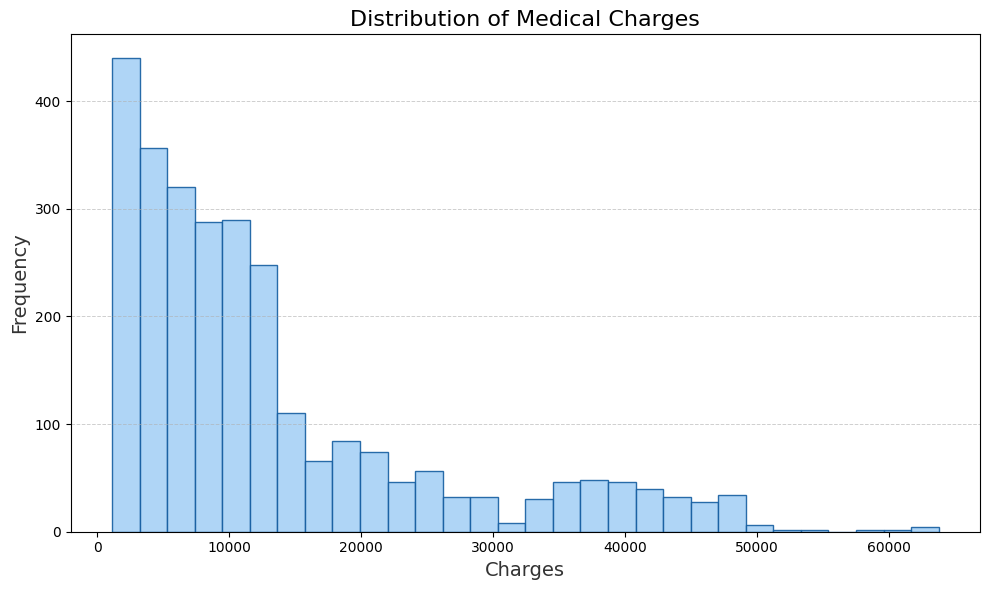

In [14]:
# Visualize distribution of charges
main_color = "#1877F2"  # Primary color (blue)
secondary_color = "#A6D1F5"  # Lightened version for a softer look

plt.figure(figsize=(10, 6))
plt.hist(df['charges'], bins=30, color=secondary_color, edgecolor="#145DA0", alpha=0.9)
plt.title('Distribution of Medical Charges', fontsize=16)
plt.xlabel('Charges', fontsize=14, color="#333333")
plt.ylabel('Frequency', fontsize=14, color="#333333")
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)
plt.tight_layout()
plt.show()

**Distribution of Charges by Smoking Status**

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

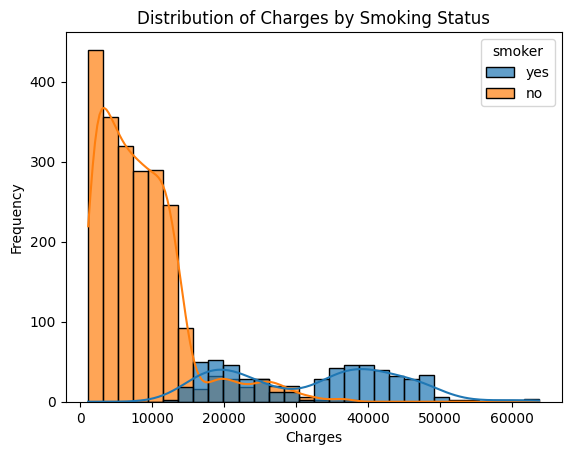

In [19]:
sns.histplot(data=df, x="charges", hue="smoker", kde=True, bins=30, alpha=0.7)
plt.title("Distribution of Charges by Smoking Status")
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.show()

**Scatter Plot of BMI vs. Charges**

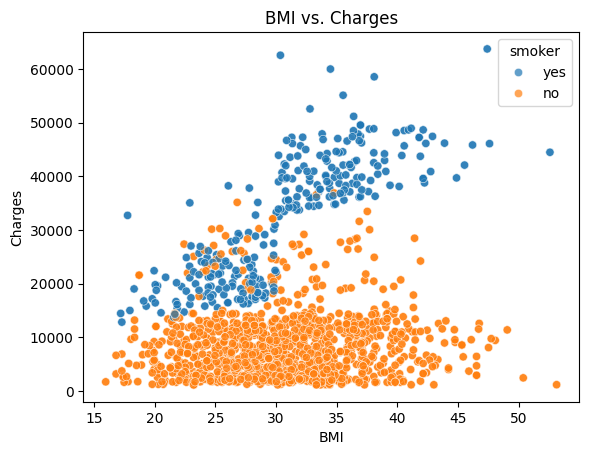

In [20]:
sns.scatterplot(data=df, x="bmi", y="charges", hue="smoker", alpha=0.7)
plt.title("BMI vs. Charges")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()

# Model and iNterpretation

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [22]:
# Encode categorical variables
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df = pd.get_dummies(df, columns=['region'], drop_first=True)

# Split the data
X = df.drop('charges', axis=1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest regressor
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

MAE: 1277.42
MSE: 7543423.78
RMSE: 2746.53
R²: 0.95


**1. Mean Absolute Error (MAE): 1277.42**
- On average, the model’s predictions are off by about **$1,277** from the actual insurance charges.

---

**2. Mean Squared Error (MSE): 7,543,423.78**
- This is the average of the squared differences between the predicted and actual charges. Squaring emphasizes larger errors.

---

**3. Root Mean Squared Error (RMSE): 2746.53**
- This is the square root of the MSE, making it easier to interpret since it’s in the same unit as the target variable (dollars). The model’s typical error is approximately **$2,747**.
- RMSE penalizes larger errors more heavily than MAE. In this case, the value indicates reasonably accurate predictions, but errors can still reach significant amounts for some cases.

---

**4. R² (R-Squared): 0.95**
- The model explains **95% of the variance** in the target variable (`charges`).
- A high R² value (close to 1) indicates that the model fits the data well.